# Домашнее задание по динамической оптимизации в экономике и финансах 2021

Работу выполнил ЗОЛотарев АНТон ОЛЕгович

## Начальные условия

* $a_1$ = 9
* $a_2$ = 16
* $a_3$ = 13
* $b_1$ = 1
* $b_2$ = 15
* $b_3$ = 20
* $c_1$ = 16
* $c_2$ = 13
* $c_3$ = 6

In [1]:
import math
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

a1, a2, a3 = 9, 16, 13
b1, b2, b3 = 1, 15, 20
c1, c2, c3 = 16, 13, 6

Универсальная функция для поиска численного экстремума функционала

In [14]:
def voc_solver(f, edge_bounds, start, end, num_of_fractions=51, method='L-BFGS-B'):
    t = np.linspace(start, end, num_of_fractions)
    dt = t[1] - t[0]
    
    bounds = [(None, None) for _ in range(0, num_of_fractions)]
    
    if len(edge_bounds)==2:
        bounds[0], bounds[-1] = edge_bounds
    else:
        bounds[0] = edge_bounds
        
    y0 = [bounds[0][0] + .5 for _ in range(0, num_of_fractions)]
    
    def solver():
        res = minimize(lambda y: f(y, dt), y0, method=method, bounds=bounds)
        
        return res.x
    
    return t, solver

# Решение

## Численный экстремум функционала

$\int_0^2 y^{'2}+9y^{'}y+y^2+16y\cdot e^{2t} dt$

$y(0)=-15$, $y(2)=20$

### Решение задачи минимизации

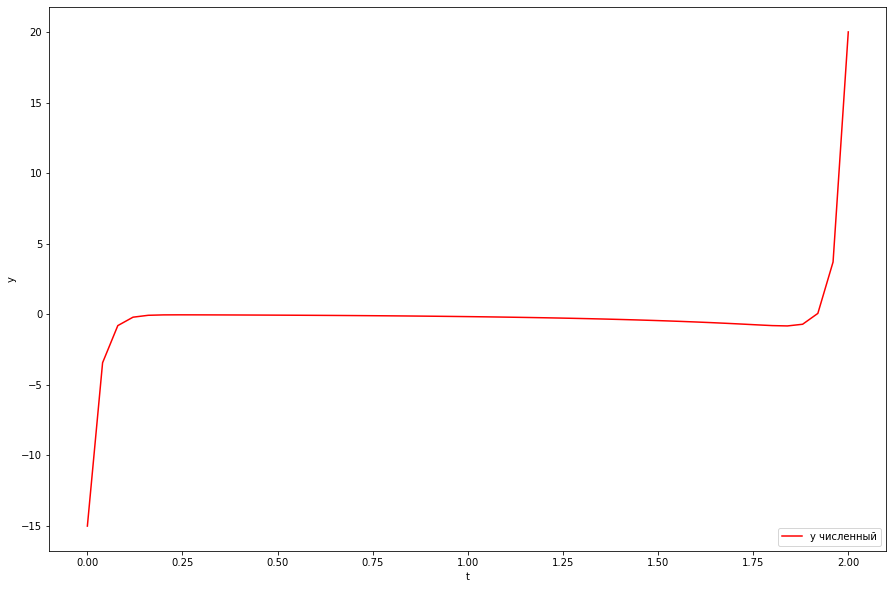

In [150]:
t, solve = voc_solver(
                    lambda y, dt: np.sum((y[1:]-y[:-1]/dt)**2+\
                                         9*(y[1:]-y[:-1]/dt)*y[1:]+\
                                         y[1:]**2+\
                                         16*y[1:]*np.exp(2*t[1:])),
                    edge_bounds=((-15.0-10e-6, -15.0+10e-6), (20.0-10e-6, 20.0+10e-6)),
                    start=0, end=2)

y_opt = solve()

# Построим график и покажем график для численного y
plt.figure(figsize=(15, 10))
plt.plot(t, y_opt, 'r', label='y численный')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

In [2]:
num_of_fractions = 201
t = np.linspace(0, 2, num_of_fractions)
dt = t[1] - t[0]
len(range(0, num_of_fractions))

201

In [3]:
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + 15},
        {'type': 'eq', 'fun': lambda x: x[-1] -20})

`gtol` termination condition is satisfied.
Number of iterations: 252, function evaluations: 50904, CG iterations: 11607, optimality: 6.95e-02, constraint violation: 0.00e+00, execution time:  4.2 s.


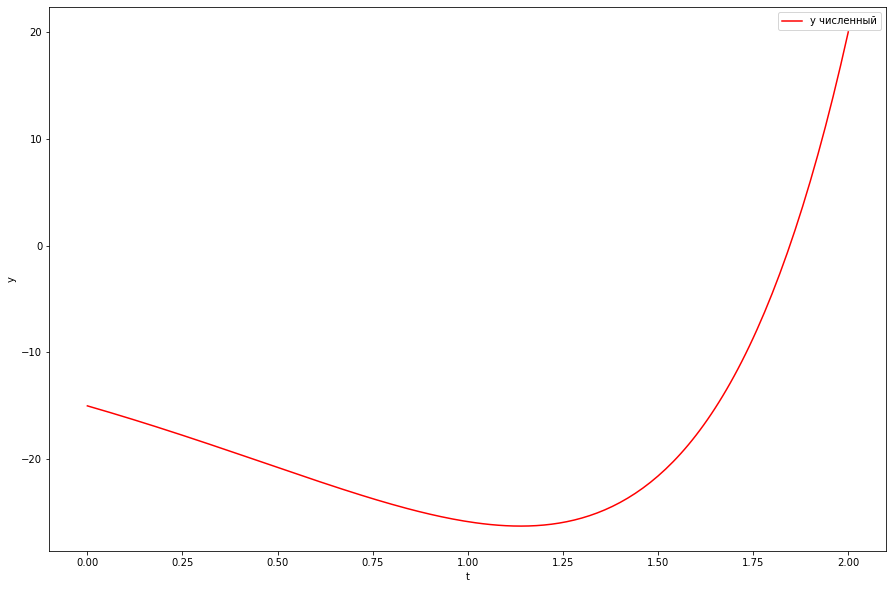

In [164]:
def f(y):
    # y'(t) = [y(t)-y(t-1)]/dt
    derivative = y[1:]-y[:-1]
    return np.sum((derivative/dt)**2+9*(derivative/dt)*y[1:]+y[1:]**2+16*y[1:]*np.exp(2*t[1:]))
y0 = [0.0 for x in range(0, num_of_fractions)]

bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (-15.0, -15.0), (20.0, 20.0)

res = minimize(f, y0, method='trust-constr', bounds=bounds, constraints=cons,
               options={'gtol': 1e-1, 'disp': True})

# Построим график и покажем график для численного y
plt.figure(figsize=(15, 10))
plt.plot(t, res.x, 'r')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()

In [82]:
print("Численное значение интеграла в соответствии с алгоритмом 'trust-constr' равно", np.sum(res.x))

Численное значение интеграла в соответствии с алгоритмом 'trust-constr' равно -3627.0971944667344


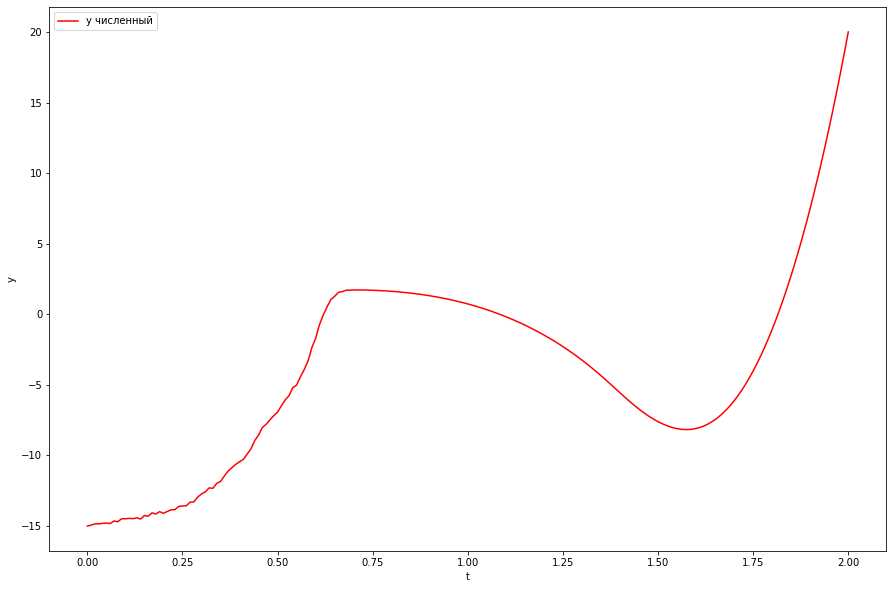

In [165]:
y0 = [0.1*x for x in range(0, num_of_fractions)]
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (-15.0-10e-6, -15.0+10e-6), (20.0-10e-6, 20.0+10e-6)
res = minimize(f, y0, method='L-BFGS-B', bounds=bounds)

# Построим график и покажем график для численного y
plt.figure(figsize=(15, 10))
plt.plot(t, res.x, 'r', label='y численный')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [149]:
print("Численное значение интеграла в соответствии с алгоритмом 'L-BFGS-B' равно", np.sum(res.x))

Численное значение интеграла в соответствии с алгоритмом 'L-BFGS-B' равно -789.0457034176698


В зависимости от алгоритма оптимизации и разных начальных условий у0 получаются разные ответы для численного экстремума функционала

### Решение задачи максимизации

C:\Users\zolotarev\Anaconda3\lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
C:\Users\zolotarev\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
C:\Users\zolotarev\Anaconda3\lib\site-packages\scipy\optimize\_trustregion_constr\qp_subproblem.py:114: RuntimeWarning: overflow encountered in double_scalars
  discriminant = b*b - 4*a*c
C:\Users\zolotarev\Anaconda3\lib\site-packages\scipy\optimize\_trustregion_constr\qp_subproblem.py:114: RuntimeWarning: invalid value encountered in double_scalars
  discriminant = b*b - 4

`xtol` termination condition is satisfied.
Number of iterations: 772, function evaluations: 64034, CG iterations: 90961, optimality: 3.55e+151, constraint violation: 8.16e+120, execution time: 1.6e+01 s.


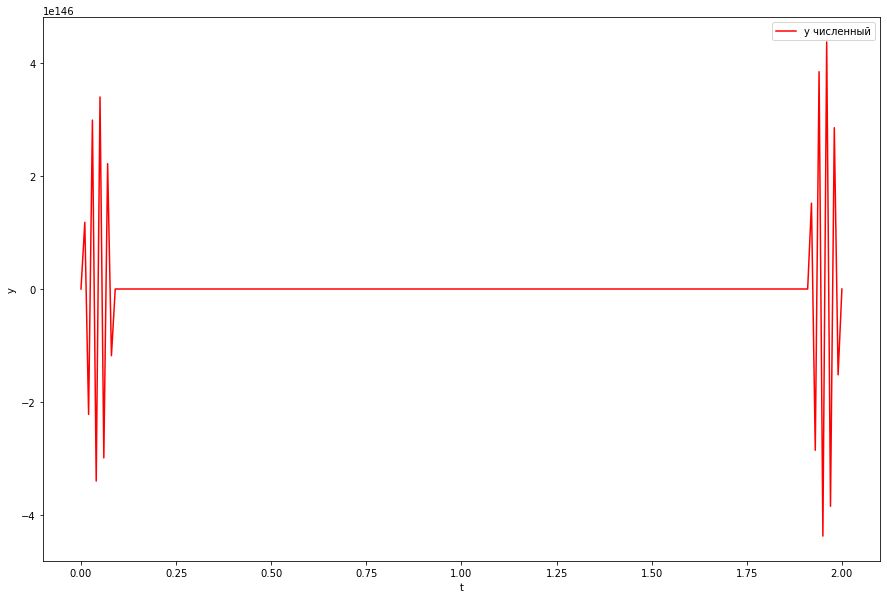

In [4]:
def f(y, sign=-1.0):
    # y'(t) = [y(t)-y(t-1)]/dt
    derivative = y[1:]-y[:-1]
    return sign*np.sum((derivative/dt)**2+9*(derivative/dt)*y[1:]+y[1:]**2+16*y[1:]*np.exp(2*t[1:]))
y0 = [0.0 for x in range(0, num_of_fractions)]

bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (-15.0, -15.0), (20.0, 20.0)

res = minimize(f, y0, method='trust-constr', bounds=bounds, constraints=cons,
               options={'gtol': 1e-1, 'disp': True})

# Построим график и покажем график для численного y
plt.figure(figsize=(15, 10))
plt.plot(t, res.x, 'r')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(('y численный', 'y аналитический'))
plt.show()

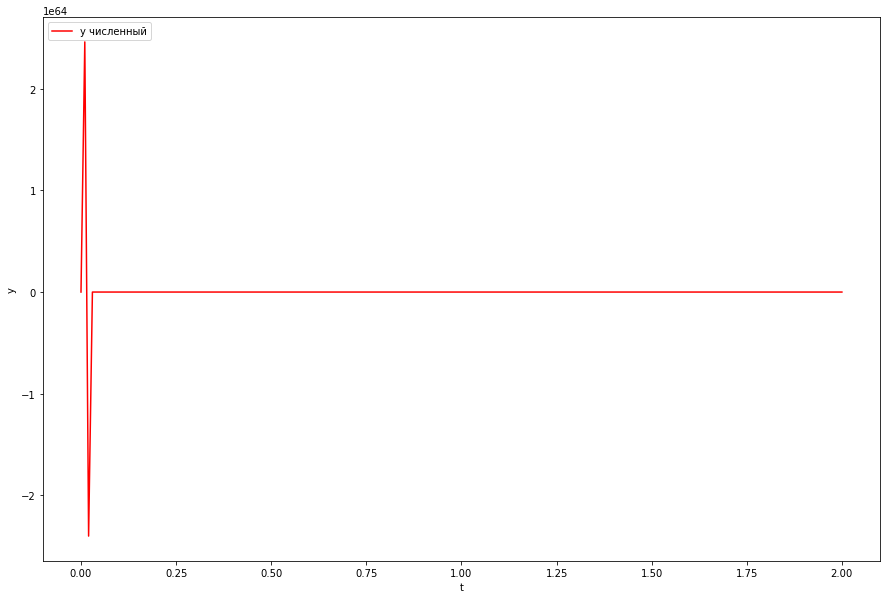

In [5]:
y0 = [0.1*x for x in range(0, num_of_fractions)]
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (-15.0-10e-6, -15.0+10e-6), (20.0-10e-6, 20.0+10e-6)
res = minimize(f, y0, method='L-BFGS-B', bounds=bounds)

# Построим график и покажем график для численного y
plt.figure(figsize=(15, 10))
plt.plot(t, res.x, 'r', label='y численный')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

Поиск численного решения задачи максимизации через разные алгоритмы оптимизации не сошёлся к адекватной гладкой задаче -> кажется, что максимума нет

## Численный экстремум функционала

$\int_0^2 (y - 15\cdot u )dt$

$y^{'} = 13y+u$

$y(0)=9$, $y(2) \in (-\infty, +\infty)$

$u(t)\in [-16, 13]$

Осуществим небольшие преобразования для того, чтобы данную задачу можно было загнать в Python:

$u = y^{'}-13y$

$\int_0^2 (y - 15(y^{'}-13y) )dt = \int_0^2 (196y-15y^{'})dt$

Ограничения на $u$ перепишем в терминах y:

$- 16 \le y^{'}-13y \le 13$

$y^{'} = \frac{dy}{dt}$

### Решение задачи минимизации

In [6]:
num_of_fractions = 201
t = np.linspace(0, 2, num_of_fractions)
dt = t[1] - t[0]
dt

0.01

In [7]:
def f(y):
    # y'(t) = [y(t)-y(t-1)]/dt
    derivative =  y[1:]-y[:-1]
    return np.sum(196*y[1:]-15*derivative/dt)

y0 = [-1.0 for x in range(0, num_of_fractions)]

#Задаём ограничение y_0 = a_1
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0] = (-9.0-10e-3, -9.0+10e-3)

# Задаём ограничения на u
cons = ({'type': 'ineq', 'fun': lambda x:  (x[1:]-x[:-1])/dt - 13*x[1:] +16},
        {'type': 'ineq', 'fun': lambda x: -(x[1:]-x[:-1])/dt + 13*x[1:] +13},
       {'type': 'eq', 'fun': lambda x: x[0]+9})

res = minimize(f, y0, method='trust-constr', bounds=bounds, constraints=cons)

C:\Users\zolotarev\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


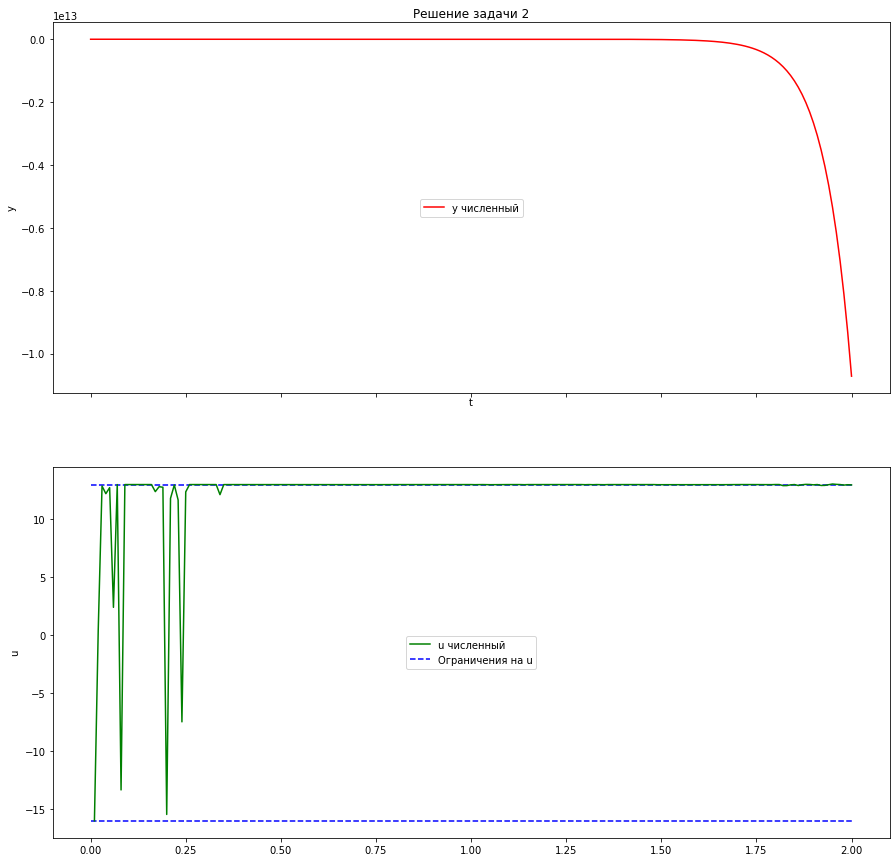

In [8]:
u = (res.x[1:]-res.x[:-1])/dt-13*res.x[1:]
# Построим график и покажем график для численного y
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,15))
ax1.set_xlabel('t')
ax1.set_ylabel('y')
ax1.plot(t, res.x, 'r', label='y численный')
ax1.set_title('Решение задачи 2')
ax1.legend(loc='center')
ax2.plot(t[1:], u, 'g', label='u численный')
ax2.set_ylabel('u')
ax2.hlines([-16, 13], xmin=0, xmax=2, label='Ограничения на u', colors='b', linestyles='dashed')
ax2.legend(loc='center')

plt.show()

In [210]:
res.x[0]

-9.0

In [209]:
print("Численное значение интеграла в соответствии с алгоритмом 'trust-constr' равно", np.sum(res.x))

Численное значение интеграла в соответствии с алгоритмом 'trust-constr' равно -82451294501576.27


### Решение задачи максимизации

In [9]:
def f(y, sign=-1.0):
    # y'(t) = [y(t)-y(t-1)]/dt
    derivative =  y[1:]-y[:-1]
    return sign*np.sum(196*y[1:]-15*derivative/dt)

y0 = [-1.0 for x in range(0, num_of_fractions)]

#Задаём ограничение y_0 = a_1
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0] = (-9.0-10e-3, -9.0+10e-3)

# Задаём ограничения на u
cons = ({'type': 'ineq', 'fun': lambda x:  (x[1:]-x[:-1])/dt - 13*x[1:] +16},
        {'type': 'ineq', 'fun': lambda x: -(x[1:]-x[:-1])/dt + 13*x[1:] +13},
       {'type': 'eq', 'fun': lambda x: x[0]+9})

res = minimize(f, y0, method='trust-constr', bounds=bounds, constraints=cons)

C:\Users\zolotarev\Anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


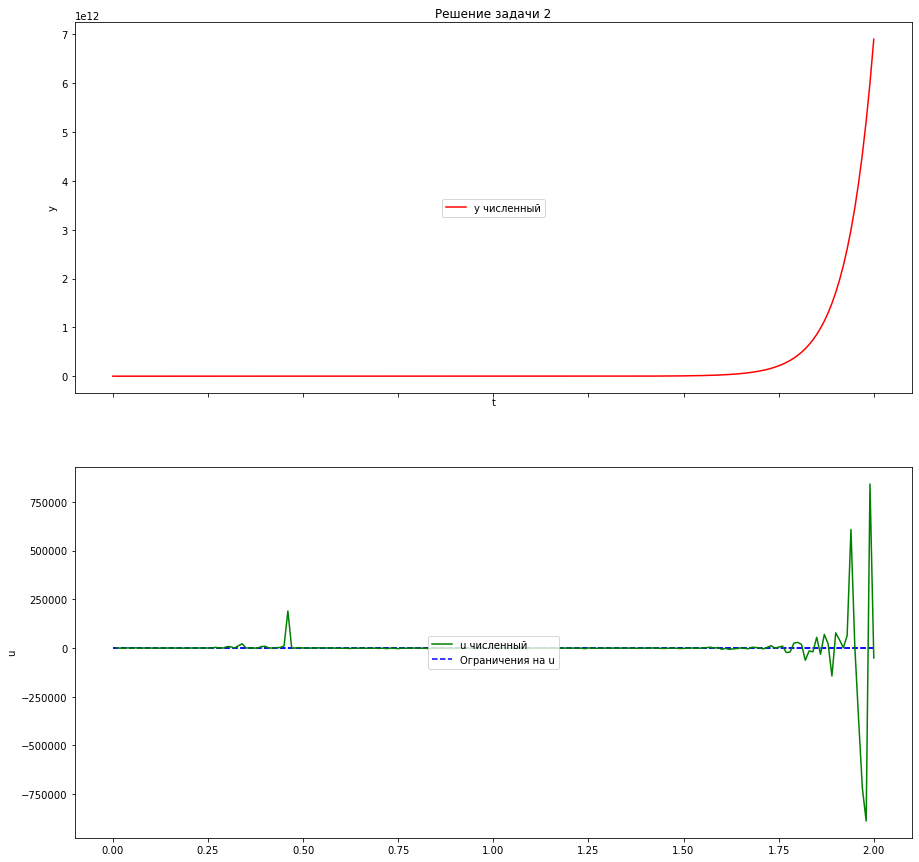

In [10]:
u = (res.x[1:]-res.x[:-1])/dt-13*res.x[1:]
# Построим график и покажем график для численного y
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,15))
ax1.set_xlabel('t')
ax1.set_ylabel('y')
ax1.plot(t, res.x, 'r', label='y численный')
ax1.set_title('Решение задачи 2')
ax1.legend(loc='center')
ax2.plot(t[1:], u, 'g', label='u численный')
ax2.set_ylabel('u')
ax2.hlines([-16, 13], xmin=0, xmax=2, label='Ограничения на u', colors='b', linestyles='dashed')
ax2.legend(loc='center')

plt.show()

Ограничения для задачи максимизации не выполняются - можем полагать отсутствие максимума в данной задаче.

## Excel...

## Excel...

## Excel...

## Экстремаль функционала

$\int_0^{\frac{\pi}{2}} (y^{'2}-y^2) dt $

$ y(0)=1, y(\frac{\pi}{2})=2 $

Аналитически решим задачу, чтобы найти экстремаль функционала через уравнение Эйлера:

$F(t, y, y^{'})=y^{'2}-y^2$

$F_y-\frac{d}{dt}F_{y^{'}}=0$

$F_y=-2y$

$F_{y^{'}}=-2y^{'}$

$y^{''}+y=0$

$\lambda=\pm\sqrt{-1}=\pm i$

$y(t)=c_1\cdot \cos(t)+c_2\cdot\sin(t)$

Решим задачу Коши, чтобы найти точные значения константы:

$1=c_1\cdot1+c_2\cdot0$

$2=c_1\cdot0+c_2\cdot1$

Итого получаем следующую экстремаль:

$y=cos(t)+2\cdot\sin(t)$

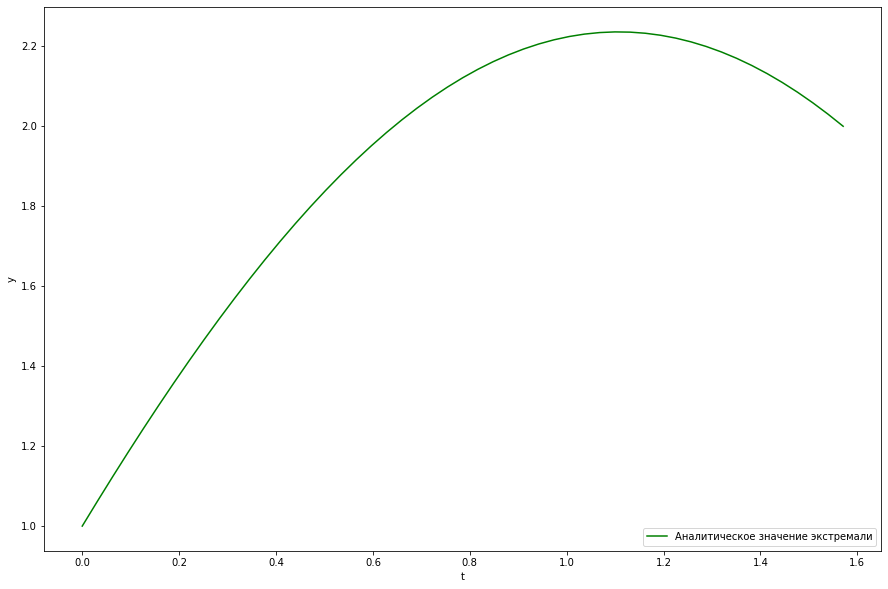

In [12]:
num_of_fractions=51
t = np.linspace(0, np.pi/2, num_of_fractions)
y = np.cos(t)+2*np.sin(t)

plt.figure(figsize=(15, 10))
plt.plot(t, y, 'g', label="Аналитическое значение экстремали")
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

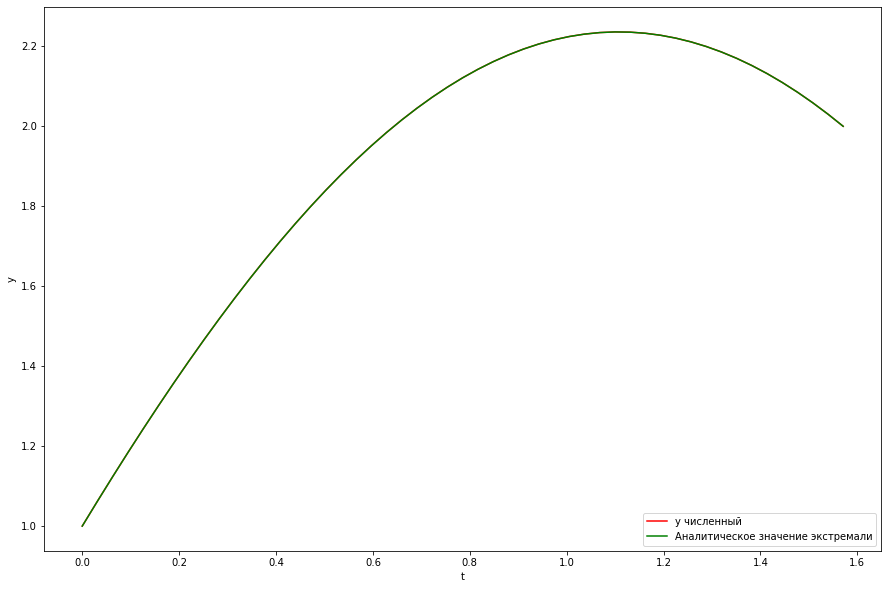

In [15]:
t, solve = voc_solver(
                    lambda y, dt: np.sum(((y[1:]-y[:-1])/dt)**2-y[1:]**2),
                    edge_bounds=((1.0 - 10e-6, 1.0 + 10e-6), (2.0 - 10e-6, 2.0 + 10e-6)),
                    start=0, end=np.pi/2,
                    method='l-bfgs-b',
                    num_of_fractions=51)

y_opt = solve()

# Построим график и покажем график для численного y
plt.figure(figsize=(15, 10))
plt.plot(t, y_opt, 'r', label='y численный')
plt.plot(t, y, 'g', label="Аналитическое значение экстремали")
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

In [141]:
print("Численное значение интеграла в соответствии с алгоритмом 'L-BFGS-B' равно", np.sum(y_opt))

Численное значение интеграла в соответствии с алгоритмом 'L-BFGS-B' равно 96.98883504784891


## Задача оптимального управления

$ \int_0^{10} (y(t)-cos(t))^2+ u^2(t) dt \rightarrow min$

$ y(0)=0, u(t) \in (-\infty, +\infty) $

s.t.

(a) $y^{'}(t)=u(t)$

(б) $y^{'}(t)=u(t)+y(t)$

In [125]:
m = GEKKO(remote=False)
t = m.Var(value=0)

t

0

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  5
   Intermediates:  0
   Connections  :  0
   Equations    :  4
   Residuals    :  4
 
 Number of state variables:    7000
 Number of total equations: -  6000
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    1000
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
      

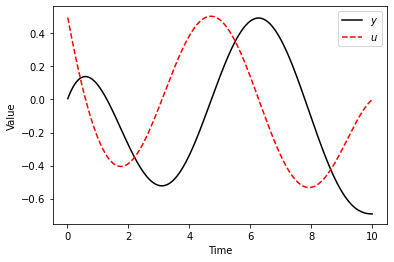

In [130]:
from gekko import GEKKO

# Инициализируем модель
m = GEKKO(remote=False)
nt = 1001
m.time = np.linspace(0,10,nt)

# Задаём переменные
y = m.Var(value=0)
z = m.Var(value=0)
u = m.Var(value=0)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == (y - m.cos(t))**2+u**2)
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=True)


# Рисуем получившееся решение
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  5
   Intermediates:  0
   Connections  :  0
   Equations    :  4
   Residuals    :  4
 
 Number of state variables:    7000
 Number of total equations: -  6000
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    1000
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
      

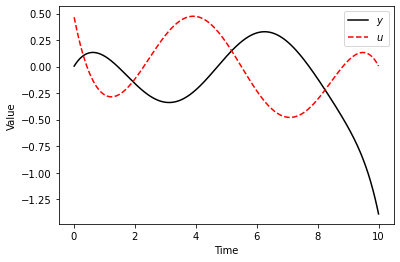

In [131]:
# Инициализируем модель
m = GEKKO(remote=False)
nt = 1001
m.time = np.linspace(0,10,nt)

# Задаём переменные
y = m.Var(value=0)
z = m.Var(value=0)
u = m.Var(value=0)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == y+u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == (y - m.cos(t))**2+u**2)
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=True)


# Рисуем получившееся решение
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()